# Prepare data test

In [ ]:
# prepare the required modules
!pip install seaborn

In [1]:
# data test for autocomplete
import json

with open('words_autocomplete1.json', 'r') as fp:
    w_autocomplete = json.load(fp)

In [79]:
import random
import re
len(w_autocomplete)

465142

In [143]:
# randomnly select 200 words from 465142 1 gram and 2 gram in datasets and NIFS Ontology
# - select word with length between 3 and 15
# - word do not contain number

"""
Uncomment these line and the run if you want to generate new datasets
"""

# words = list(w_autocomplete.keys())
# testwords = []
# for i in range(200):
#     while True:
#         pos = random.randint(0, len(w_autocomplete)-1)
#         word = words[pos]
#         if '/' not in word and len(word)>2 and len(word) < 15 and not bool(re.search(r'\d', word)) and len(word.split())==1:
#             testwords += [word]
#             break

# # save data test to file
# with open('test_autocomplete_pure.json', 'w') as fp:
#     json.dump(testwords, fp)
    
# # prepare data for 1 typo
# test_1typo = []
# for word in testwords:
#     pos = random.randint(1, len(word)-1) 
#     test_1typo += [word[:pos]+'*'+word[pos+1:]]

# # save data test typo to file
# with open('test_autocomplete_typo.json', 'w') as fp:
#     json.dump(test_1typo, fp)

'\nUncomment these line and the run if you want to generate new datasets\n'

In [51]:
"""Run these line to load the available datasets"""

# load data test pure
with open('test_autocomplete_pure.json', 'r') as fp:
    testwords = json.load(fp)
    
# load data test with typo
with open('test_autocomplete_typo.json', 'r') as fp:
    test_1typo = json.load(fp)

In [108]:
# method to populate experiment result
def getAutoCompleteData(url, file, datatest, label):
    import requests
    from time import time
    start = time()
    results = {}
    
    for word in datatest:
        start_in = time()
        response = requests.get(url+word.strip())
        results[word] = [label, response.json(), len(response.json()), len(word), time()-start_in]
        
    print((time()-start)/len(datatest), 'seconds')
    with open(file, 'w') as fp:
        json.dump(results, fp)
    return results

# Get Autocompletion result for all setup

In [109]:
# testing fast-autocomplete
url = 'http://130.216.216.55/autocomplete?query='
results_pure_fa = getAutoCompleteData(url, 'results_pure_fa.json', testwords, 'fast')
results_pure_fa

0.032802098989486696 seconds


{'sinonasal': ['fast',
  ['sinonasal', 'sinonasal papilloma', 'sinonasal undifferentiated'],
  3,
  9,
  0.020547866821289062],
 'acid-oxo': ['fast',
  ['acid oxo',
   'acid oxoanion',
   'acid oxo group',
   'acid oxoacid',
   'acid oxoanions',
   'acid oxoacids',
   'acid oxoglutarate',
   'acid oxoglutarate dehydrogenase',
   'acid oxoacyl-',
   'acid oxoacyl- and'],
  10,
  8,
  0.030984878540039062],
 'chondrichthyes': ['fast', ['chondrichthyes'], 1, 14, 0.0192720890045166],
 'turbellarian': ['fast',
  ['turbellarian', 'turbellarian platyhelminths'],
  2,
  12,
  0.027085065841674805],
 'rig-b': ['fast',
  ['rig b',
   'rig by',
   'rig biosynthetic',
   'rig biosynthetic process',
   'rig binding',
   'rig biosynthesis',
   'rig bone',
   'rig breakdown',
   'rig beta',
   'rig body'],
  10,
  5,
  0.029307842254638672],
 'riib': ['fast', ['riib'], 1, 4, 0.05146217346191406],
 'cribriform': ['fast',
  ['cribriform',
   'cribriform carcinoma',
   'cribriform type',
   'cribriform 

In [110]:
# testing SciGraph
url = 'http://130.216.216.55/autocomplete_sc?query='
results_pure_sc = getAutoCompleteData(url, 'results_pure_sc.json', testwords, 'SciGraph')
results_pure_sc

0.8019108843803405 seconds


{'sinonasal': ['SciGraph', [], 0, 9, 0.811906099319458],
 'acid-oxo': ['SciGraph', [], 0, 8, 0.7533938884735107],
 'chondrichthyes': ['SciGraph', ['chondrichthyes'], 1, 14, 0.8135061264038086],
 'turbellarian': ['SciGraph',
  ['turbellarian platyhelminths'],
  1,
  12,
  0.7639601230621338],
 'rig-b': ['SciGraph', ['rig-b'], 1, 5, 0.8074951171875],
 'riib': ['SciGraph', [], 0, 4, 0.7680540084838867],
 'cribriform': ['SciGraph',
  ['cribriform',
   'cribriform carcinoma',
   'cribriform plate',
   'cribriform variant testicular seminoma'],
  4,
  10,
  0.7630171775817871],
 'andryl': ['SciGraph', ['andryl 200'], 1, 6, 0.7527720928192139],
 'hypothesis': ['SciGraph',
  ['hypothesis browser',
   'hypothesis testing and power calculations for comparing metagenomic samples from hmp',
   'hypothesis textual entity'],
  3,
  10,
  0.8042318820953369],
 'tentorium': ['SciGraph', ['tentorium cerebelli'], 1, 9, 0.7981228828430176],
 'malleomyces': ['SciGraph',
  ['malleomyces mallei', 'malleomyc

['sinon*sal',
 'acid-o*o',
 'chondricht*yes',
 'turbel*arian',
 'rig*b',
 'rii*',
 'cri*riform',
 'and*yl',
 'hy*othesis',
 'tent*rium',
 'malleomyc*s',
 'crin*chetorum',
 'fur*ow',
 'tmd*',
 'an*se',
 'n*-primary',
 'osakaen*is',
 'para*tacidae',
 'tn*cr',
 'o*cology',
 'lindacon*s',
 'myo*ibre',
 'hadr*ns',
 'cer*brosidase',
 'epili*',
 'path*genicity',
 'fer*oportin',
 'mead*w',
 'valsa*tan',
 'ja*',
 'enigm*',
 'm*l',
 'cbi*',
 'ren*n',
 'k*atp)',
 'u*u',
 'sensa*al',
 'morn*ng',
 'r*f',
 'chain*',
 'hebephreni*',
 'activ*tory',
 'ycd*',
 'pi*olinate',
 'm*d',
 'morphi*',
 'aph*mesthaesia',
 'di*',
 'sr*f',
 'ca*allus',
 'dode*enoyl-coa',
 'd*lusion',
 'malonatic*',
 'c*binae',
 "lion'*",
 'goobe*',
 'hla-*',
 'supra*thmoid',
 'lyi*g',
 'godw*n',
 "painter'*",
 'cpti*b',
 'c*oh-terminal',
 'f*dgetin',
 'reli*ra',
 'y*fa',
 'sa*ivatary',
 'sto*ium',
 'pte*oid',
 'akinet*c',
 'antitoxi*',
 'x*phiinae',
 'so*',
 'hyp*virus',
 'xe*ar',
 'parvu*',
 'l*weye',
 'sig*aling',
 'pglyrp*beta'

In [111]:
# testing fast-autocomplete
url = 'http://130.216.216.55/autocomplete?query='
results_1typo_fa = getAutoCompleteData(url, 'results_1typo_fa.json', test_1typo, 'fast 1 typo')
results_1typo_fa

0.0747116756439209 seconds


{'sinon*sal': ['fast 1 typo',
  ['sinonasal', 'sinonasal papilloma', 'sinonasal undifferentiated'],
  3,
  9,
  0.07429695129394531],
 'acid-o*o': ['fast 1 typo',
  ['acid',
   'acid oxidase',
   'acid oxidation',
   'acid o-linked',
   'acid omega-hydroxylase',
   'acid or',
   'acid o-methyltransferase',
   'acid oxygenase',
   'acid optimum',
   'acid oxidoreductase'],
  10,
  8,
  0.016849040985107422],
 'chondricht*yes': ['fast 1 typo',
  ['chondrichthyes'],
  1,
  14,
  0.2011871337890625],
 'turbel*arian': ['fast 1 typo',
  ['turbellarian', 'turbellarian platyhelminths'],
  2,
  12,
  0.32494688034057617],
 'rig*b': ['fast 1 typo', ['rigb'], 1, 5, 0.024251937866210938],
 'rii*': ['fast 1 typo',
  ['rii',
   'riii',
   'riib',
   'rii-2',
   'rii-a',
   'rii-b',
   'rii-c',
   'rii-1',
   'riiib',
   'riiia'],
  10,
  4,
  0.026665925979614258],
 'cri*riform': ['fast 1 typo',
  ['cribriform',
   'cribriform carcinoma',
   'cribriform type',
   'cribriform plate',
   'cribriform v

In [112]:
# testing SciGraph
url = 'http://130.216.216.55/autocomplete_sc?query='
results_1typo_sc = getAutoCompleteData(url, 'results_1typo_sc.json', test_1typo, 'SciGraph 1 typo')
results_1typo_sc

0.8180917906761169 seconds


{'sinon*sal': ['SciGraph 1 typo', [], 0, 9, 0.7961068153381348],
 'acid-o*o': ['SciGraph 1 typo', [], 0, 8, 0.7518887519836426],
 'chondricht*yes': ['SciGraph 1 typo', [], 0, 14, 0.7660079002380371],
 'turbel*arian': ['SciGraph 1 typo', [], 0, 12, 0.7562978267669678],
 'rig*b': ['SciGraph 1 typo', [], 0, 5, 0.7717080116271973],
 'rii*': ['SciGraph 1 typo', [], 0, 4, 0.7675530910491943],
 'cri*riform': ['SciGraph 1 typo', [], 0, 10, 0.8523941040039062],
 'and*yl': ['SciGraph 1 typo', [], 0, 6, 0.7669551372528076],
 'hy*othesis': ['SciGraph 1 typo', [], 0, 10, 0.7466790676116943],
 'tent*rium': ['SciGraph 1 typo', [], 0, 9, 0.7513909339904785],
 'malleomyc*s': ['SciGraph 1 typo', [], 0, 11, 0.8727641105651855],
 'crin*chetorum': ['SciGraph 1 typo', [], 0, 13, 0.7494690418243408],
 'fur*ow': ['SciGraph 1 typo', [], 0, 6, 0.7607250213623047],
 'tmd*': ['SciGraph 1 typo', [], 0, 4, 0.7984068393707275],
 'an*se': ['SciGraph 1 typo', [], 0, 5, 0.7628438472747803],
 'n*-primary': ['SciGraph 1 

## Autocomplete Analysis

In [119]:
# Pure datatest fast-autocomplete vs SciGraph

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")


data = list(results_pure_fa.values()) + list(results_pure_sc.values()) + list(results_1typo_fa.values()) + list(results_1typo_sc.values())
df = pd.DataFrame(data, columns = ['label', 'returns', 'return number', 'word length', 'time'])

In [120]:
df

,label,returns,return number,word length,time
0,fast,"[sinonasal, sinonasal papilloma, sinonasal und...",3,9,0.020548
1,fast,"[acid oxo, acid oxoanion, acid oxo group, acid...",10,8,0.030985
2,fast,[chondrichthyes],1,14,0.019272
3,fast,"[turbellarian, turbellarian platyhelminths]",2,12,0.027085
4,fast,"[rig b, rig by, rig biosynthetic, rig biosynth...",10,5,0.029308
...,...,...,...,...,...
795,SciGraph 1 typo,[],0,7,0.766184
796,SciGraph 1 typo,[],0,3,0.762420
797,SciGraph 1 typo,[],0,6,0.798291
798,SciGraph 1 typo,[],0,9,0.766995


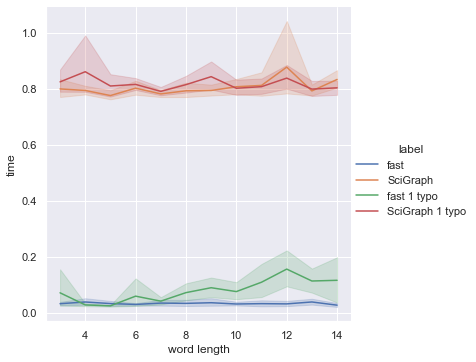

In [126]:
sns.relplot(x="word length", y="time", hue="label", kind="line", data=df);
plt.savefig("execution_time.png", dpi=300)
plt.savefig("execution_time.pdf", dpi=300)

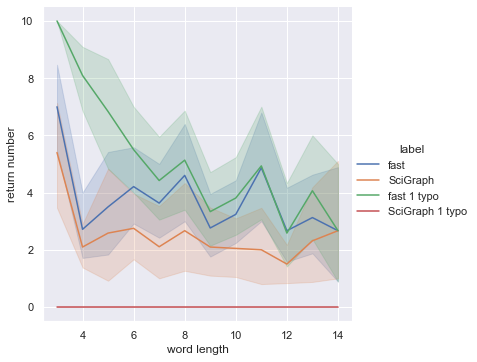

In [127]:
sns.relplot(x="word length", y="return number", hue="label", kind="line", data=df);
plt.savefig("return_number.png", dpi=300)
plt.savefig("return_number.pdf", dpi=300)